In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVR,SVC
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,confusion_matrix
from scipy.stats import uniform,randint
import warnings 
warnings.filterwarnings('ignore')

## Pierwszy zbiór

In [2]:
data = pd.read_csv('./ramka.csv')

In [3]:
y = data.loc[:,'m2.price']
data.head(10)

,Unnamed: 0,m2.price,construction.year,surface,floor,no.rooms,district
0,1,5897,1953,25,3,1,Srodmiescie
1,2,1818,1992,143,9,5,Bielany
2,3,3643,1937,56,1,2,Praga
3,4,3517,1995,93,7,3,Ochota
4,5,3013,1992,144,6,5,Mokotow
5,6,5795,1926,61,6,2,Srodmiescie
6,7,2983,1970,127,8,5,Mokotow
7,8,2346,1985,105,8,4,Ursus
8,9,4745,1928,145,6,6,Srodmiescie
9,10,4284,1949,112,9,4,Srodmiescie


In [4]:
dummies = pd.get_dummies(data = data, columns = ['district'])
data[dummies.columns] = dummies
data.drop(['Unnamed: 0','m2.price','district'],axis=1,inplace=True)

Nie wykonuje żadnych przekstałceń danych, jedynie koduje kolumnę district,tak aby móc puścic na danych algorytm. 

In [138]:
data.describe()

,construction.year,surface,floor,no.rooms,district_Bemowo,district_Bielany,district_Mokotow,district_Ochota,district_Praga,district_Srodmiescie,district_Ursus,district_Ursynow,district_Wola,district_Zoliborz
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1964.823000,85.590000,5.623000,3.360000,0.098000,0.096000,0.107000,0.096000,0.092000,0.10000,0.105000,0.103000,0.106000,0.097000
std,25.831511,37.874799,2.899876,1.381415,0.297463,0.294739,0.309268,0.294739,0.289171,0.30015,0.306707,0.304111,0.307992,0.296106
min,1920.000000,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1943.000000,53.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1965.000000,85.500000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1988.000000,118.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,2010.000000,150.000000,10.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   construction.year     1000 non-null   int64
 1   surface               1000 non-null   int64
 2   floor                 1000 non-null   int64
 3   no.rooms              1000 non-null   int64
 4   district_Bemowo       1000 non-null   uint8
 5   district_Bielany      1000 non-null   uint8
 6   district_Mokotow      1000 non-null   uint8
 7   district_Ochota       1000 non-null   uint8
 8   district_Praga        1000 non-null   uint8
 9   district_Srodmiescie  1000 non-null   uint8
 10  district_Ursus        1000 non-null   uint8
 11  district_Ursynow      1000 non-null   uint8
 12  district_Wola         1000 non-null   uint8
 13  district_Zoliborz     1000 non-null   uint8
dtypes: int64(4), uint8(10)
memory usage: 41.1 KB


Nie mamy brakujących danych.

In [149]:
def run_model(metric, data, y,params = {'C':1},scaling=False):
    X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2, random_state=41)
    matrix = None
    if scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    if metric == 'rmse':
        svm = SVR(**params)
        svm.fit(X_train,y_train)
        pred = svm.predict(X_test)
        score = mean_squared_error(y_test,pred,squared=False)
    elif metric == 'r2':
        svm = SVR(**params)
        svm.fit(X_train,y_train)
        pred = svm.predict(X_test)
        score = r2_score(y_test,pred)
    elif metric == 'acc':
        svm = SVC(**params)
        svm.fit(X_train,y_train)
        pred = svm.predict(X_test)
        score = accuracy_score(y_test,pred)
        matrix = confusion_matrix(y_test,pred)
    return score,matrix,y_test,pred


Mean of y = 3487.019 and std= 906.6916512185327


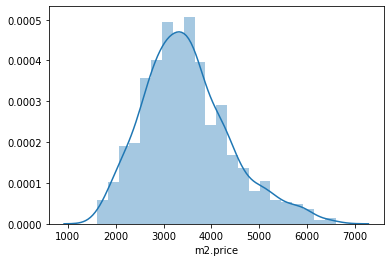

In [59]:
sns.distplot(y)
print(f'Mean of y = {y.mean()} and std= {y.std()}')

W celu możliwości lepszego uświadomienia sobie jaki błąd będzie popelnial model dobrze narysować zmienną celu, tak aby lepiej wyobrazić sobie co chcemy przewidywać.

## Testy bez skalowania

In [169]:
x = run_model('rmse',data,y)
x[0] #błąd RMSE

911.7676954177709

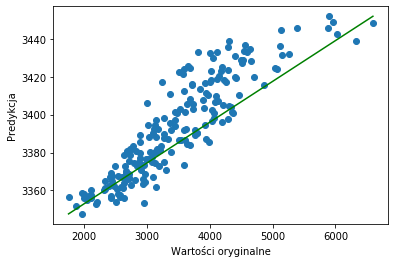

In [181]:
def diff(val, pred):
    plt.scatter(x = val, y = pred)
    plt.plot([min(val), max(val)], [min(pred), max(pred)],linestyle='-', color='g')
    plt.ylabel("Predykcja")
    plt.xlabel("Wartości oryginalne")
    
diff(x[2],x[3])

In [170]:
run_model('r2',data,y)[0] #wynik R2

-0.004931272910966067

Z racji tego że samo RMSE może nie być do konća informatywne zdecydowałem się użyć także miary R2, która jasno przyjmuje że najlepszy możliwy wynik to 1. Jednoczęsnie widać iż predykcje dane przez algorytm bez skalowania są mocno niedokładne. Sam wynik RMSE jest porównywalny z odchyleniem standardowym.

## Testy ze skalowaniem

In [171]:
x = run_model('rmse',data,y,scaling=True)
x[0]

888.5909778319751

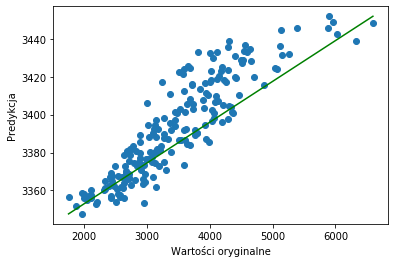

In [182]:
diff(x[2],x[3])

In [174]:
run_model('r2',data,y)[0]

-0.004931272910966067

Skalowanie dało niewielką poprawę wyniku w wartościach liczbowych, jednakże na wykresie widać zauważalną poprawę.

## Random search

In [37]:
dist = dict(C=uniform(loc=0, scale=100),
                     kernel = ['rbf','poly','linear','sigmoid'],
                    gamma = ['scale','auto'],
                    degree = randint(low=2,high=10))

def grid(metric,distributions,data,y):
    X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=41)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    if metric == 'rmse':
        svm = SVR()
        clf = RandomizedSearchCV(svm, distributions, random_state=0,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1,
                                 cv=5)
        search = clf.fit(X_train,y_train)
        print(f'Score: {np.sqrt(abs(clf.best_score_))}, Params: {search.best_params_}')
    elif metric == 'acc':
        svm = SVC()
        clf = RandomizedSearchCV(svm, distributions, random_state=0,
                         scoring='accuracy',
                         n_jobs=-1,
                         cv=3)
        search = clf.fit(X_train,y_train)
        print(f'Score: {clf.best_score_}, Params: {search.best_params_}')
    return search


In [33]:
search = grid('rmse',dist,data,y)

Score: 309.5049618003559, Params: {'C': 95.71551589530463, 'degree': 9, 'gamma': 'auto', 'kernel': 'rbf'}


In [165]:
x = run_model('rmse',data,y,scaling=True,params=search.best_params_)
x[0]

335.5191259856772

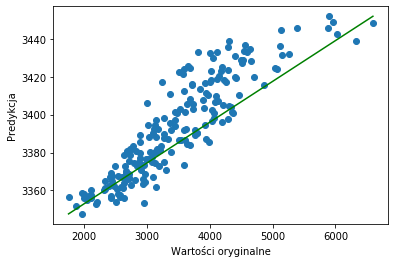

In [183]:
diff(x[2],x[3])

In [70]:
run_model('r2',data,y,scaling=True,params=search.best_params_)[0]

0.8639174234486735

Random search znacząco poprawił wyniki, które są już co najmniej akceptowalne, zwłaszcza wynik R2 wzrósł znacząco.

## Mój zbiór

In [134]:
data1 = pd.read_csv('./diabetes.csv')

Cel - decyzja czy któs ma cukrzycę, czy też nie
Opis zbioru: 
- preg - number of times pregnant
- plas - glucose concentration a 2 hours in an oral glucose tolerance test
- pres - blood pressure (mm Hg)
- skin - skin fold thickness (mm)
- insu - Insulin2-Hour serum insulin (mu U/ml)
- mass - BMIBody mass index (weight in kg/(height in m)^2)
- pedi -  pedigree function
- age - Age (years)
- y - OutcomeClass variable (0 or 1)

In [140]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Nie mamy do czynienia z żadnymi brakującymi danymi.

In [133]:
data1.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


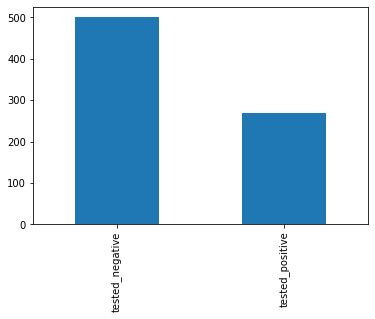

In [96]:
data1['class'].value_counts().plot(kind='bar')

Zmienna celu jest lekko niezbalansowana, być może prócz accuracy warto przestudiować macierz pomyłek.

In [146]:
data1['class'] = data1['class'].map({'tested_positive':1,'tested_negative':0})
data1

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [147]:
y1 = data1.loc[:,'class']
data1.drop(['class'],axis=1,inplace=True)

## Testy bez skalowania

In [152]:
score,matrix = run_model('acc',data1,y1)[:2]
score

0.7597402597402597

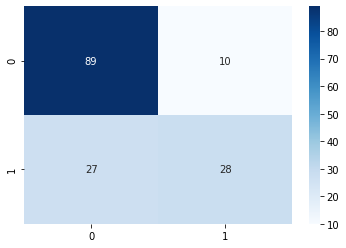

In [153]:
sns.heatmap(matrix, annot=True,cmap='Blues')

## Testy ze skalowaniem

In [154]:
score, matrix =run_model('acc',data1,y1,scaling=True)[:2]
score

0.7857142857142857

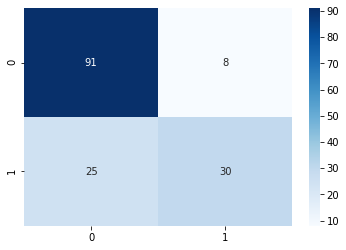

In [155]:
sns.heatmap(matrix, annot=True,cmap='Blues')

Podobnie jak poprzednio skalowanie delikatnie poprawia wynik, co jasno sugeruje że ma ono wpływ na działanie algorytmu. Tym razem w przeciwieństwie do poprzedniego zadania regresji algorytm bez poprawiania parametrów poradził sobie całkiem dobrze.

## Random search

In [128]:
search = grid('acc',dist,data1,y1)

Score: 0.7638811142209783, Params: {'C': 64.58941130666561, 'degree': 6, 'gamma': 'auto', 'kernel': 'linear'}


In [129]:
score, matrix = run_model('acc',data1,y1,scaling=True,params=search.best_params_)[:2]
score

0.7857142857142857

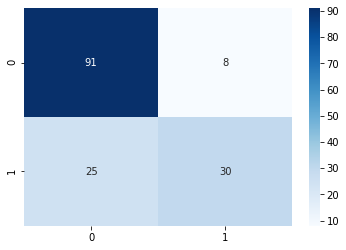

In [130]:
sns.heatmap(matrix, annot=True,cmap='Blues')

Tym razem random search nie poprawił wyniku, jednakże warto zwrócić uwagę iż w żadnej z prób na tym zbiorze algorytm nie był w stanie zbytnio poprawić wykrywalności w drugiej, mniej licznej klasie, a jedynie poprawiały się wyniki na prostszej, to jest tej klasie która miała więcej elementów. Ogólnie można stwierdzić, iż SVM są względnie dobrymi algorytmami zdolnymi do satysfakcjonujących predykcji, zwłaszcza po odpowiednim wytrenowaniu parametrów. Po drugie w obu przeprowadzonych przez mnie eksperymentach skalowanie poprawiało wynik, co jasno sugeruje że SVM działają lepiej, gdy dane im podane są w jakis sposób ustandaryzowane.